In [144]:
import numpy as np 
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
X = df.data
y = df.target
y = np.where(y == 0,-1, y)
c = np.random.randn(len(X.transpose()) + 1) * 0.01
oldC = np.zeros(len(X.transpose()) + 1)
ones = np.ones((len(X),1))
X = np.append(X, ones, axis=1)
iterCount = 0
def areweDoneYet(oldC, c):
    return np.linalg.norm(c - oldC) < (10 ** -5)

while not areweDoneYet(oldC, c):
    s = 0
    s = 1/len(X) * sum((y[i] * (X[i].T)) / (1 + np.exp(min((y[i] * X[i]).dot(oldC), 700))) for i in range(len(X)))
    oldC = c.copy()
    c+= (10 ** -5) * s
    iterCount+=1

print('iteration count:',iterCount)
s = 0
for i in range(0,len(X)):
    s += np.log(1 + np.exp(np.dot(-y[i] * X[i],c)))
s = np.sign(X.dot(c))


print('error:',1 - sum(s == y)/len(y))




iteration count: 1913
error: 0.08084358523725832


c:\Users\gaida\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gaida\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gaida\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gaida\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

0.3555555555555555
0.011111111111111072
[[ 6.34253701e-01 -2.13313110e-01  6.94250814e-01 -1.33755287e+00
   5.61202614e-04 -1.14766878e-03]]


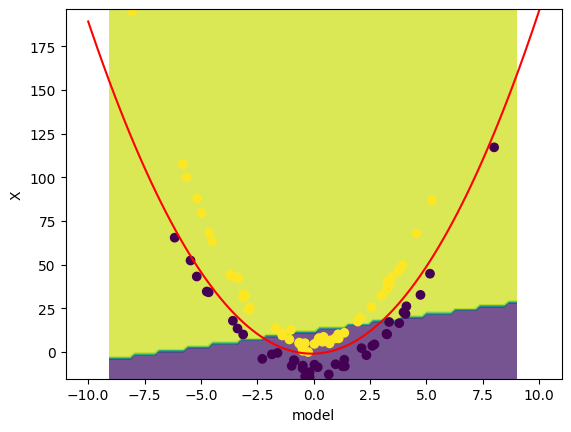

In [151]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt 
f = np.loadtxt('samplePoints.csv',delimiter=',')
f = pd.DataFrame(f, columns = ['a','b','y'])
y = f.loc[:,'y'].to_numpy()
X = f.loc[:,['a','b']].to_numpy()
y = np.array([y]).T
model1 = LogisticRegression()
score = cross_val_score(model1,X,y)
print(1 - score.mean())

poly = PolynomialFeatures()
orig = X
X = poly.fit_transform(X)
model = LogisticRegression(fit_intercept= False)
score = cross_val_score(model,X,y).mean()
print(1 - score)
model.fit(X,y)
print(model.coef_)
model1.fit(orig,y)

fit = DecisionBoundaryDisplay.from_estimator(model1, orig, response_method = 'predict',xlabel ='model',ylabel = 'X',alpha = 0.75)
fit.ax_.scatter(orig[:,0],orig[:,1],c = y)
x_1 = np.linspace(-10,10,100)
x_2 = [0.00144092 * (-634 + 213 * x + 1340 * x**2) for x in x_1]
plt.plot(x_1,x_2,color='red')
plt.show()


In [147]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('dna',as_frame = False,return_X_y=True)
errorRate = []
for i in range(-3,7):
    model = LogisticRegression(C = 10 ** i,max_iter = 10000)
    # print('score:',cross_val_score(model,X,y).mean())
    errorRate.append(1 - cross_val_score(model,X,y).mean())



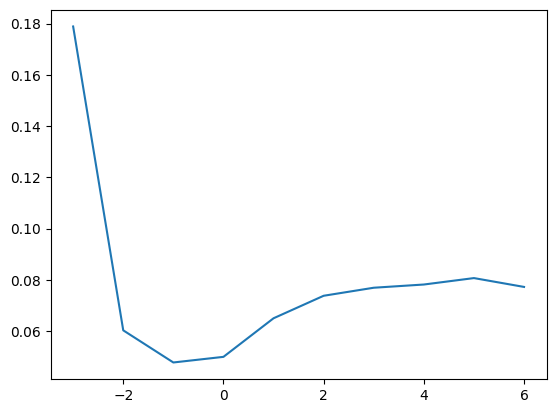

In [145]:
plt.plot([i for i in range(-3,7)],errorRate)
plt.show()

In [142]:
from sklearn.model_selection import GridSearchCV, KFold

X,y = fetch_openml('diabetes',as_frame = False,return_X_y=True)

solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
C = [10 ** i for i in range(-4,5)]
model  = GridSearchCV(estimator = LogisticRegression(max_iter = 10000), param_grid = {'C': C, 'solver':solvers},cv = KFold(10))
model.fit(X,y)
print(model.best_params_)
print(model.best_score_)

print('450 total models trained b/c 10 folds * 9 different coefficients * 5 different log regressions')
    


{'C': 10, 'solver': 'newton-cg'}
0.7799555707450445
450 total models trained b/c 10 folds * 9 different coefficients * 5 different log regressions
